In [1]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

from CASutils import plotposition_utils as plotpos
importlib.reload(plotpos)

<module 'CASutils.plotposition_utils' from '/home/islas/python/CASanalysis/CASutils/plotposition_utils.py'>

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/checkcloudy/"

In [3]:
data_scam = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/t850_laggedregs/laggedreg_scam_withclearsky.nc")

In [4]:
def plotlaggedreg(data,titlestr,ylabelstr,x1,x2,y1,y2,color='darkred',yticks=None,yticknames=None,yrange=None, xlabel=False):
    ax = fig.add_axes(np.array([x1,y1,(x2-x1),(y2-y1)]))
    ax.plot([-10,10],[0,0],color='black')
    ax.plot(np.arange(-10,11,1), data, color=color, linewidth=2)
    ax.set_xticks([-10,-8,-6,-4,-2,0,2,4,6,8,10])
    ax.set_xticklabels(['-10','-8','-6','-4','-2','0','2','4','6','8','10'], fontsize=12)
    ax.set_ylabel(ylabelstr, fontsize=14)
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlim(-10,10)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=12)
        
    if (yrange):
        ax.set_ylim(yrange)
        
    if (xlabel):
        ax.set_xlabel('Lag (days)', fontsize=14)
        
    return ax

def oplotlaggedreg(ax, data, color='darkred'):
    ax.plot(np.arange(-10,11,1), data, color=color, linewidth=2)
    return ax

In [5]:
x1, x2, y1, y2 = plotpos.get3by6coords()

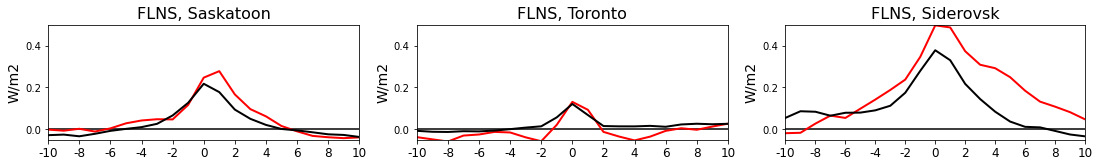

In [6]:
fig = plt.figure(figsize=(16,16))

ax = plotlaggedreg(-1.*(data_scam.flnsregclm5.isel(city=0) - data_scam.flnsregsnowd.isel(city=0)),'FLNS, Saskatoon','W/m2', x1[0],x2[0],y1[0],y2[0],color='red',
                  yrange=(-0.05,0.5))
ax = oplotlaggedreg(ax, -1.*(data_scam.flnscregclm5.isel(city=0) - data_scam.flnscregsnowd.isel(city=0)),color='black')

ax = plotlaggedreg(-1.*(data_scam.flnsregclm5.isel(city=1) - data_scam.flnsregsnowd.isel(city=1)),'FLNS, Toronto','W/m2', x1[1],x2[1],y1[1],y2[1],color='red',
                  yrange=(-0.05,0.5))
ax = oplotlaggedreg(ax, -1.*(data_scam.flnscregclm5.isel(city=1) - data_scam.flnscregsnowd.isel(city=1)), color='black')

ax = plotlaggedreg(-1.*(data_scam.flnsregclm5.isel(city=2) - data_scam.flnsregsnowd.isel(city=2)),'FLNS, Siderovsk','W/m2',x1[2],x2[2],y1[2],y2[2],color='red',
                  yrange=(-0.05,0.5))
ax = oplotlaggedreg(ax, -1.*(data_scam.flnscregclm5.isel(city=2) - data_scam.flnscregsnowd.isel(city=2)), color='black')


In [7]:
data = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/trefhtptile_composites/"+
                       "3cities/trefhtptilecomposites_3cities_scam_clminit_60days_clearsky.nc")

In [8]:
print(data.flns_snowd)

<xarray.DataArray 'flns_snowd' (ptile: 10, city: 3)>
array([[ 4.092104,  5.551336, 12.452323],
       [-0.983406,  4.511796,  5.268006],
       [-4.051258,  4.87363 ,  1.758538],
       [-1.755773,  0.951609,  0.34874 ],
       [-2.952111, -0.383288, -0.048507],
       [-1.516145,  2.698415, -2.351885],
       [-3.024375,  0.563677, -5.501159],
       [ 0.223954, -2.981174, -4.388288],
       [ 1.398472, -6.449445, -4.490677],
       [ 2.76564 , -8.978081, -5.380908]])
Coordinates:
  * ptile    (ptile) int64 0 1 2 3 4 5 6 7 8 9
  * city     (city) object 'Saskatoon' 'Toronto' 'Siderovsk'


In [9]:
print(data.flns_clm5 - data.flns_snowd)

<xarray.DataArray (ptile: 10, city: 3)>
array([[ 7.62620156,  2.05045957,  8.78058181],
       [ 3.37110428,  1.32668586,  6.12422158],
       [ 1.64770199,  0.31620254,  2.64753145],
       [-0.08429985,  0.98978716,  1.5247615 ],
       [ 0.20963067,  2.35536279,  0.03975982],
       [-0.48843225, -2.24317085, -3.58246736],
       [-2.22415774, -0.70253966, -0.7997674 ],
       [ 0.84556003, -0.78168902, -2.54969718],
       [-2.71058577, -1.36770304, -4.42795973],
       [-3.40778358, -1.91464942, -5.34103371]])
Coordinates:
  * ptile    (ptile) int64 0 1 2 3 4 5 6 7 8 9
  * city     (city) object 'Saskatoon' 'Toronto' 'Siderovsk'


In [10]:
def plotcomposite(data, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot([0,10],[0,0], color='black')
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    ax.set_xticks(list(np.arange(0,10,1)+0.5))
    ax.set_xlim(0,10)
    ax.set_xticklabels(['1-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-99'], rotation=60, ha="right", rotation_mode="anchor")
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlabel('CLM5 percentile bin', fontsize=14)
    ax.set_ylabel(ylabelstr, fontsize=14)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

def plotcomposite_noxlabel(data, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot([0,10],[0,0], color='black')
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    ax.set_xticks(list(np.arange(0,10,1)+0.5))
    ax.set_xlim(0,10)
    ax.set_xticklabels([' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], rotation=60, ha="right", rotation_mode="anchor")
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlabel(' ', fontsize=14)
    ax.set_ylabel(ylabelstr, fontsize=14)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

def oplotcomposite(ax, data, color="darkblue"):
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    return ax

#def oplotcomposite_dottedempty(ax, data, color="darkblue"):
#    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidt)


def plotcomposite_lev(data, lev, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot(data, -1.*lev, color=color, linewidth=2)
    ax.plot(data, -1.*lev, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

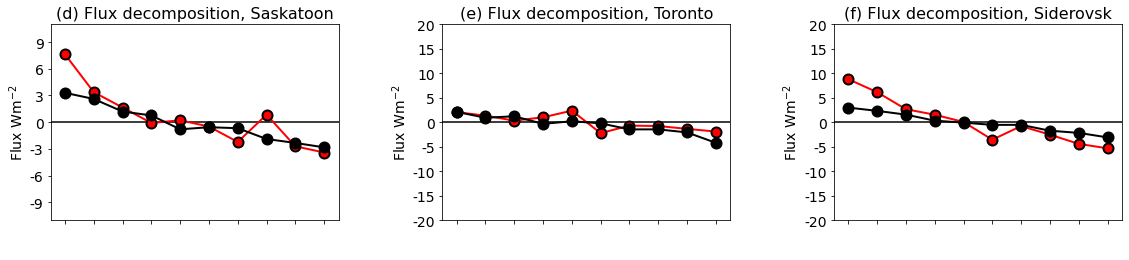

In [14]:
fig = plt.figure(figsize=(16,16))

#ax4 = plotcomposite_noxlabel(data.flns_clm5[:,0] - data.flns_snowd[:,0],' ',' ',0.04,0.29,0.6,0.77,color='red')


ax4 = plotcomposite_noxlabel(data.flns_clm5[:,0] - data.flns_snowd[:,0],'(d) Flux decomposition, Saskatoon','Flux Wm$^{-2}$', 0.04,0.29,0.6,0.77, color='red',
                            yrange=(-11,11), yticks=[-9,-6,-3,0,3,6,9],yticknames=['-9','-6','-3','0','3','6','9'])
ax4 = oplotcomposite(ax4, data.flnsc_clm5[:,0] - data.flnsc_snowd[:,0],color='black')

ax5 = plotcomposite_noxlabel(data.flns_clm5[:,1] - data.flns_snowd[:,1],'(e) Flux decomposition, Toronto','Flux Wm$^{-2}$', 0.38,0.63,0.6,0.77, color='red',
                            yrange=(-20,20), yticks=[-20,-15,-10,-5,0,5,10,15,20], yticknames=['-20','-15','-10','-5','0','5','10','15','20'])
ax5 = oplotcomposite(ax5, data.flnsc_clm5[:,1] - data.flnsc_snowd[:,1],color='black')

ax6 = plotcomposite_noxlabel(data.flns_clm5[:,2] - data.flns_snowd[:,2],'(f) Flux decomposition, Siderovsk','Flux Wm$^{-2}$', 0.72,0.97,0.6,0.77, color='red',
    yrange=(-20,20), yticks=[-20,-15,-10,-5,0,5,10,15,20], yticknames=['-20','-15','-10','-5','0','5','10','15','20'])
ax6 = oplotcomposite(ax6, data.flnsc_clm5[:,2] - data.flnsc_snowd[:,2], color='black')